In [1]:
import sys 
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
import pandas as pd

# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL2/'

In [2]:
vmix = np.load('VMIX2014_Arc12_monthly.npy')
ind_all = np.load('index_all.npy')
ind_eu = np.load('index_eurasian.npy')
ind_am = np.load('index_amerasian.npy')
ind_sl = np.load('index_slope.npy')

vmix_all = np.mean(vmix[:,ind_all],axis=1)
vmix_eu = np.mean(vmix[:,ind_eu],axis=1)
vmix_am = np.mean(vmix[:,ind_am],axis=1)
vmix_sl = np.mean(vmix[:,ind_sl],axis=1)

data = np.load('monthly_fluxes.npz')
data.files

['vadv2_eu',
 'vedyv2_am',
 'hadv2_eu',
 'hadv2_all',
 'hadv2_am',
 'vedyv2_eu',
 'vadv2_sl',
 'vedyv2_sl',
 'hadv2_sl',
 'vedyv2_all',
 'vadv2_am',
 'vadv2_all']

In [3]:
colors = plt.get_cmap("tab10")
np.shape(colors.colors)
months =np.linspace(0,11,12).astype(int)

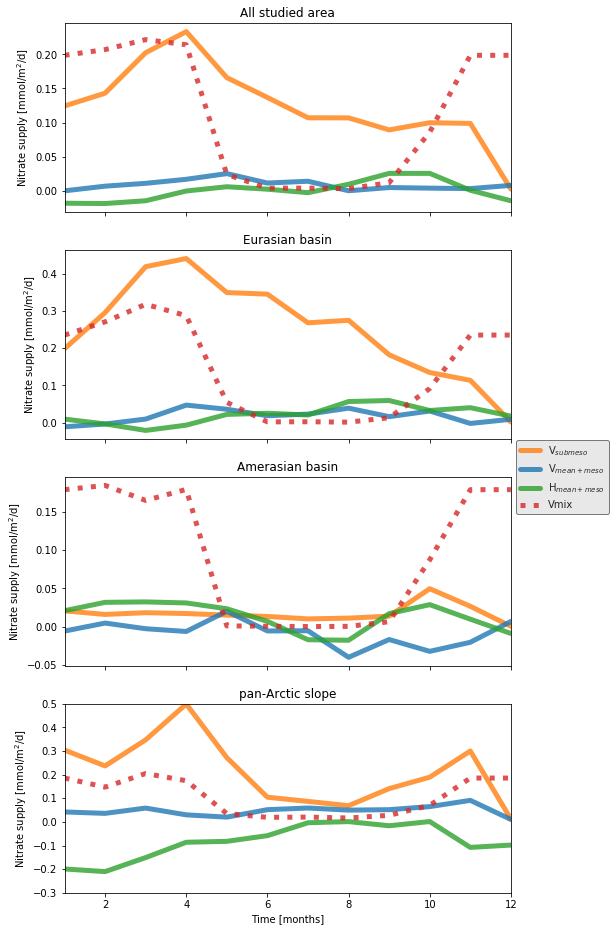

In [4]:
figsize = (8, 16)
rows,cols = 4,1
fig = plt.figure(figsize=figsize, constrained_layout=False)
axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-talk')

months = np.arange(1,13)

#balance = vedyv2_all+hadv2_all+vadv2_all+vmix_all
# axs[0].plot(months,hedy_all, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[0].plot(months,vedy_all, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[0].plot(months,hadv_all, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[0].plot(months,vadv_all, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[0].plot(months,hedyv2_all, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[0].plot(months,data['vedyv2_all'], lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[0].plot(months,data['vadv2_all'], lw=5, label='vmean',color=colors(0), alpha=0.8)
axs[0].plot(months,data['hadv2_all'], lw=5, label='hmean',color=colors(2), alpha=0.8)
axs[0].plot(months,vmix_all, ':', lw=5, label='vmix',color=colors(3), alpha=0.8)
#axs[0].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[0].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[0].set_xlim(1,12)
axs[3].set_ylim(-0.3,0.5)
axs[0].set_title('All studied area')

#balance = vedyv2_eu+hadv2_eu+vadv2_eu+vmix_eu
# axs[1].plot(months,hedy_eu, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[1].plot(months,vedy_eu, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[1].plot(months,hadv_eu, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[1].plot(months,vadv_eu, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[1].plot(months,hedyv2_eu, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[1].plot(months,data['vedyv2_eu'], lw=5, label='vedy',color=colors(1), alpha=0.8)
axs[1].plot(months,data['vadv2_eu'], lw=5, label='vmean',color=colors(0), alpha=0.8)
axs[1].plot(months,data['hadv2_eu'], lw=5, label='hmean',color=colors(2), alpha=0.8)
axs[1].plot(months,vmix_eu, ':', lw=5, label='vmix',color=colors(3), alpha=0.8)
#axs[1].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[1].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[1].set_xlim(1,12)
axs[3].set_ylim(-0.3,0.5)
axs[1].set_title('Eurasian basin')

#balance = vedyv2_am+hadv2_am+vadv2_am+vmix_am
# axs[2].plot(months,hedy_am, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[2].plot(months,vedy_am, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[2].plot(months,hadv_am, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[2].plot(months,vadv_am, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[2].plot(months,hedyv2_am, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[2].plot(months,data['vedyv2_am'], lw=5, label='V$_{submeso}$',color=colors(1), alpha=0.8)
axs[2].plot(months,data['vadv2_am'], lw=5, label='V$_{mean+meso}$',color=colors(0), alpha=0.8)
axs[2].plot(months,data['hadv2_am'], lw=5, label='H$_{mean+meso}$',color=colors(2), alpha=0.8)
axs[2].plot(months,vmix_am, ':', lw=5, label='Vmix',color=colors(3), alpha=0.8)
#axs[2].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[2].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[2].set_xlim(1,12)
axs[3].set_ylim(-0.3,0.5)
axs[2].set_title('Amerasian basin')

#balance = vedyv2_sl+hadv2_sl+vadv2_sl+vmix_sl
# axs[3].plot(months,hedy_sl, lw=5, label='hedy',color=colors(0), alpha=0.8)
# axs[3].plot(months,vedy_sl, lw=5, label='vedy',color=colors(1), alpha=0.8)
# axs[3].plot(months,hadv_sl, lw=5, label='hmeso',color=colors(2), alpha=0.8)
# axs[3].plot(months,vadv_sl, lw=5, label='vmeso',color=colors(3), alpha=0.8)
#axs[3].plot(months,hedyv2_sl, lw=5, label='hedy',color=colors(0), alpha=0.8)
axs[3].plot(months,data['vedyv2_sl'], lw=5, label='V$_{submeso}$',color=colors(1), alpha=0.8)
axs[3].plot(months,data['vadv2_sl'], lw=5, label='V$_{mean+meso}$',color=colors(0), alpha=0.8)
axs[3].plot(months,data['hadv2_sl'], lw=5, label='H$_{mean+meso}$',color=colors(2), alpha=0.8)
axs[3].plot(months,vmix_sl, ':', lw=5,label='Vmix',color=colors(3), alpha=0.8)
#axs[3].plot(months,balance, lw=5, label='total',color='k', alpha=0.8)
axs[3].set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
axs[3].set_xlim(1,12)
axs[3].set_ylim(-0.3,0.5)
axs[3].set_xlabel('Time [months]')
axs[3].set_title('pan-Arctic slope')

axs[2].legend(loc='center left', bbox_to_anchor=(1, 1),frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)

plt.savefig(save_path+'seasonnal_reynold.png', dpi = 300, bbox_inches='tight') 